## MLServer

In [1]:
import json
import copy

def load_json(filename):
    with open(filename, 'r') as json_file:
        json_dict = json.load(json_file)
    return json_dict

def combine_dict(metric):
    def _remove_key(d):
        d_copy = copy.deepcopy(d)
        del d_copy["thresholds"]
        return d_copy
    
    return {
        "base": _remove_key(base["metrics"][metric]),
        "oc_"+str(50/50): _remove_key(oc_50["metrics"][metric]),
        "oc_"+str(55/50): _remove_key(oc_55["metrics"][metric]),
        "oc_"+str(60/50): _remove_key(oc_60["metrics"][metric]),
        "oc_"+str(75/50): _remove_key(oc_75["metrics"][metric]),
    }

In [78]:
import pandas as pd

directory = "mlserver_exp1/"

base = load_json(directory+"base.json")
oc_50 = load_json(directory+"oc_50.json")
oc_55 = load_json(directory+"oc_55.json")
oc_60 = load_json(directory+"oc_60.json")
oc_75 = load_json(directory+"oc_75.json")

rest = combine_dict("http_req_duration{scenario:default}")
grpc = combine_dict("grpc_req_duration{scenario:default}")

rest_df = pd.DataFrame.from_dict(rest).T
grpc_df = pd.DataFrame.from_dict(grpc).T

In [81]:
print(rest_df)

             min        med           max       p(90)       p(95)         avg
base    1.977965  17.088815    111.147623   28.078783   31.667985   17.602320
oc_1.0  2.254326  18.125998    127.669131   30.592226   35.347882   18.964346
oc_1.1  2.372834  26.290835   8661.420331   86.360173  262.277194   73.984895
oc_1.2  2.494908  34.027693   6958.211953  184.301494  465.058363  126.784335
oc_1.5  2.199197  48.137473  17940.205981  529.606812  982.179263  259.793345


In [10]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

def plot(df, title, ytick=100):
    mins = df["min"]
    maxes = df["p(90)"]
    means = df["avg"]
    meds = df["med"]

    ax = plt.axes()        
    ax.yaxis.grid(color='gray') # horizontal lines

    legend_elements = [Line2D([0], [0], marker='o', color='black', label='Mean'),
                       Line2D([0], [0], marker='o', color='blue', label='Median'),
                       Line2D([0], [0], color='gray', lw=1, label='min-P(90)')]
    ax.legend(handles=legend_elements, loc='upper left')

    x = ["base", "0% commit", "10% commit", "20% commit", "50% commit"]



    plt.errorbar(x, means, fmt='ok', lw=3)
    plt.errorbar(x, meds, fmt='ok', lw=3, color='blue')
    plt.errorbar(x, means, [means - mins, maxes - means], fmt='.k', ecolor='gray', lw=1)

    plt.ylabel("latency (ms)")
    plt.title(title)

    plt.yticks(np.arange(0, max(maxes)+1, ytick))

    plt.rcParams["figure.figsize"] = (10,5)

/tmp/ipykernel_2709855/627405957.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok" (-> color='k'). The keyword argument will take precedence.
  plt.errorbar(x, meds, fmt='ok', lw=3, color='blue')


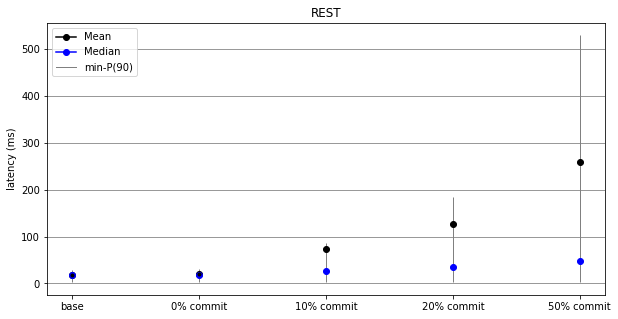

In [83]:
plot(rest_df, "REST")


/tmp/ipykernel_2709855/627405957.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok" (-> color='k'). The keyword argument will take precedence.
  plt.errorbar(x, meds, fmt='ok', lw=3, color='blue')


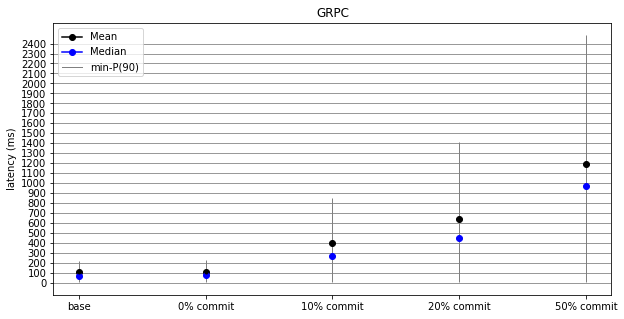

In [84]:
plot(grpc_df, "GRPC")

## Triton

In [5]:
import pandas as pd

directory = "triton_exp1/"

base = load_json(directory+"base.json")
oc_50 = load_json(directory+"oc_50.json")
oc_55 = load_json(directory+"oc_55.json")
oc_60 = load_json(directory+"oc_60.json")
oc_75 = load_json(directory+"oc_75.json")

rest = combine_dict("http_req_duration{scenario:default}")
grpc = combine_dict("grpc_req_duration{scenario:default}")

rest_df = pd.DataFrame.from_dict(rest).T
grpc_df = pd.DataFrame.from_dict(grpc).T

/tmp/ipykernel_298811/202463428.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok" (-> color='k'). The keyword argument will take precedence.
  plt.errorbar(x, meds, fmt='ok', lw=3, color='blue')


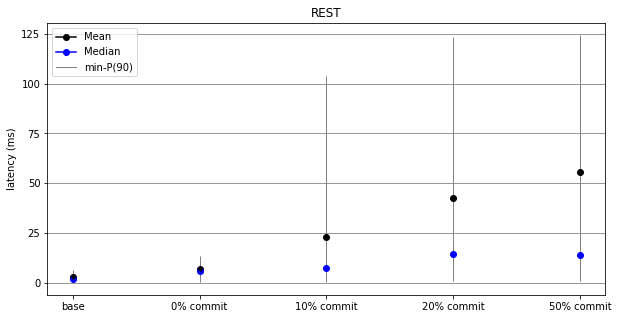

In [11]:
plot(rest_df, "REST", 25)

/tmp/ipykernel_298811/627405957.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok" (-> color='k'). The keyword argument will take precedence.
  plt.errorbar(x, meds, fmt='ok', lw=3, color='blue')


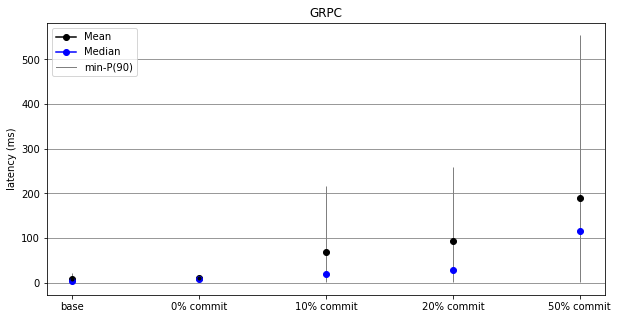

In [9]:
plot(grpc_df, "GRPC")